## Final Project Part 1 

#### Intro : Importing libraries, dataframe & head check

In [1]:
#Importing libfraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Creating Path
path = r'C:\Users\danac\Downloads\Instacart Basket Analysis Dana Roggero'

In [7]:
#Importing latest/reduced Dataframe
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_reduced2.pkl'))

In [9]:
# Display all columns
pd.set_option('display.max_columns', None)

In [13]:
instacart.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,add_to_cart_order,reordered,price_range_loc,busiest_day,busiests_day,Busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly busy,Regularly busy,Average Orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average Orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest day,Busiests day,Average Orders,5,New customer,7.930208,Low_spender,8.0,Frequent Customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Regularly busy,Leasts busy,Average Orders,3,New customer,4.972414,Low_spender,9.0,Frequent Customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,False,11,1,Mid-range product,Least busy,Leasts busy,Average Orders,3,New customer,4.972414,Low_spender,9.0,Frequent Customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


#### Security Implications :  dropping name & surname columns.

In [16]:
#Dropping name and surname columns
instacart = instacart.drop(columns=['First Name','Last Name'])

#### 3. Data Regional Segmentation

In [21]:
#Setting up the regions
result = []
for value in instacart['State']:
    if value in ('Maine'	'New Hampshire'	'Vermont'	'Massachusetts'	'Rhode Island'	'Connecticut'	'New York'	'Pennsylvania'	'New Jersey'
) :
        result.append('Northeast')
    elif value in ('Wisconsin'	'Michigan'	'Illinois'	'Indiana'	'Ohio'	'North Dakota'	'South Dakota'	'Nebraska'	'Kansas'	'Minnesota'	'Iowa'	'Missouri'
) :
        result.append('Midwest')
    elif value in ('Delaware'	'Maryland'	'District of Columbia'	'Virginia'	'West Virginia'	'North Carolina'	'South Carolina'	'Georgia'	'Florida'	'Kentucky'	'Tennessee'	'Mississippi'	'Alabama'	'Oklahoma'	'Texas'	'Arkansas'	'Louisiana'
) :
        result.append('South')
    elif value in ('Idaho'	'Montana'	'Wyoming'	'Nevada'	'Utah'	'Colorado'	'Arizona'	'New Mexico'	'Alaska'	'Washington'	'Oregon'	'California'	'Hawaii'
) :
        result.append('West')
    else :
        result.append('Not a region')

In [23]:
#Assigning the values in result[] to new column Region
instacart['region']=result

In [25]:
instacart['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

#### Creating a crosstab to compare spending habits in different regions

In [28]:
crosstab = pd.crosstab (instacart['region'], instacart['spender_flag'],dropna = False)

In [30]:
crosstab.to_clipboard()

In [32]:
#Printing the crosstab
print(crosstab)

spender_flag  High_spender  Low_spender
region                                 
Midwest             155975      7441350
Northeast           108225      5614511
South               209691     10582194
West                160354      8132559


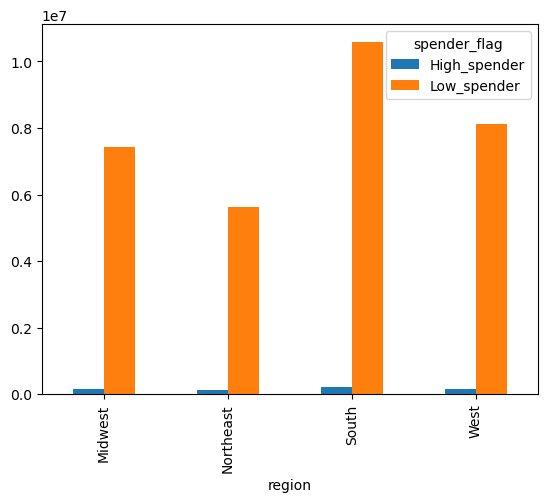

In [36]:
#Bar graph of the crosstab
bar_reg_loy =  crosstab.plot.bar()

In [38]:
#Exporting bar graph
bar_reg_loy.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','4.10 visualizations','bar_reg_loy.png'))

#### 4. Exclusion flag : to exclude low-activity customers

In [41]:
#Create a flag for customers with less than 5 orders
instacart.loc[instacart['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
instacart.loc[instacart['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [43]:
instacart['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [45]:
#Exclude low-activity customers from the dataframe
df_excluded = instacart[instacart['activity_flag'] != 'low-activity customer']

In [47]:
#Export the new dataframe: low activitie customer excluded
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

#### 5. & 6. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

##### Income 

In [73]:
#Create an Income group variable
instacart.loc[instacart['Income'] <= 55000, 'income_group'] = 'low-income'
instacart.loc[(instacart['Income'] > 55000) & (instacart['Income'] <= 150000), 'income_group'] = 'middle-income'
instacart.loc[instacart['Income'] > 150000, 'income_group'] = 'high-income'

In [75]:
#Check the counts of income groups
instacart['income_group'].value_counts(dropna = False)

income_group
middle-income    23614034
low-income        4739985
high-income       4050840
Name: count, dtype: int64

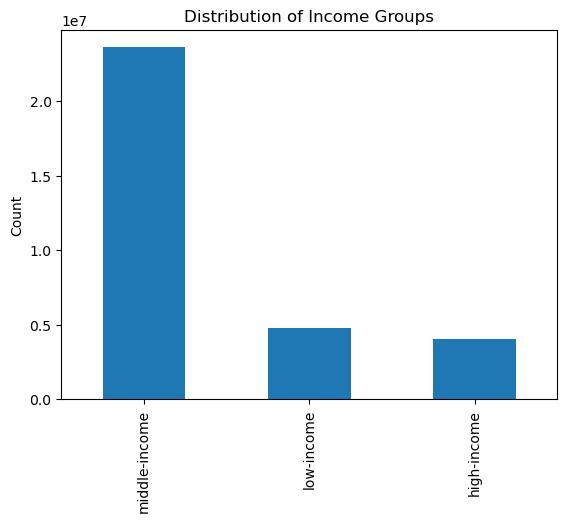

In [77]:
#Make a bar chart showing the distribution of income groups
income_group_counts = instacart['income_group'].value_counts(dropna=False)
income_group_distribution_bar = income_group_counts.plot.bar()  
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [79]:
#Export the bar chart
income_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution_bar2.png'))

##### Age

In [60]:
#Create an age group variable
instacart.loc[instacart['Age'] <= 25, 'age_group'] = 'young adult'
instacart.loc[(instacart['Age'] > 25) & (instacart['Age'] <= 44), 'age_group'] = 'adult'
instacart.loc[(instacart['Age'] > 44) & (instacart['Age'] <= 64), 'age_group'] = 'middle-aged'
instacart.loc[instacart['Age'] > 64, 'age_group'] = 'senior'

In [62]:
#Check value counts for each age group
age_group_counts = instacart['age_group'].value_counts(dropna = False)
age_group_counts

age_group
middle-aged    10139691
adult           9644895
senior          8575084
young adult     4045189
Name: count, dtype: int64

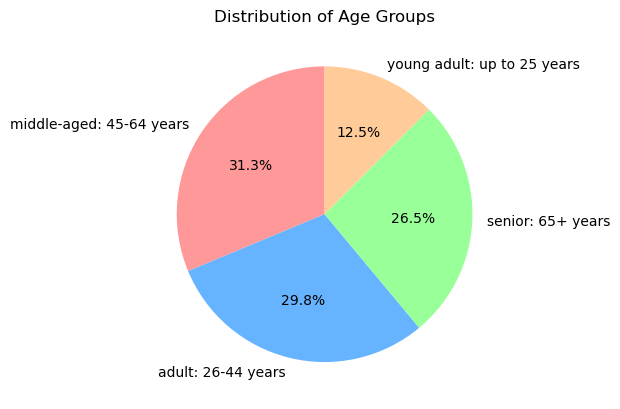

In [64]:
#Make a pie chart showing the distribution of age groups
age_group_distribution_pie = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

In [66]:
#Export chart
age_group_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie.png'))

##### Dependents

In [71]:
#Create a dependents flag
instacart.loc[instacart['Number of Dependents'] == 0, 'dependants_flag'] = 'no dependants'
instacart.loc[instacart['Number of Dependents'] >= 1, 'dependants_flag'] = 'has dependants'

In [81]:
#Check value counts
dependant_counts = instacart['dependants_flag'].value_counts(dropna = False)
dependant_counts

dependants_flag
has dependants    24307356
no dependants      8097503
Name: count, dtype: int64

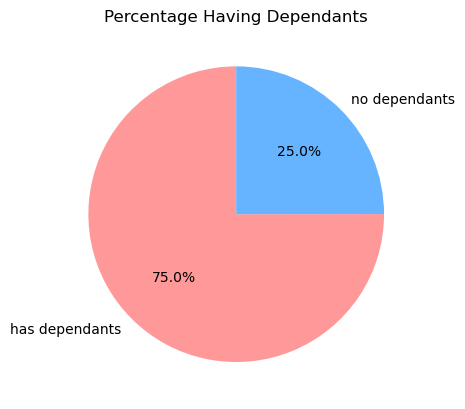

In [83]:
#Make a pie chart showing the percentage of dependants
dependants_pie = dependant_counts.plot.pie(autopct='%1.1f%%', labels= ['has dependants', 'no dependants'], startangle=90, colors=['#ff9999','#66b3ff'])
plt.ylabel('')  # Hide the y-label
plt.title('Percentage Having Dependants')
plt.show()

In [85]:
#Exporting chart
dependants_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_pie.png'))

In [89]:
#Final dataframe with all the new columns
list(instacart.columns.values)

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_last_order',
 'new_customer',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'busiests_day',
 'Busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'average_spend',
 'spender_flag',
 'Customer_frequency',
 'frequency_flag',
 'Gender',
 'State',
 'Age',
 'Date Joined',
 'Number of Dependents',
 'Family Status',
 'Income',
 'region',
 'activity_flag',
 'income_group',
 'age_group',
 'dependants_flag']

In [91]:
#Export the new dataframe
instacart.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_final.pkl'))

In [5]:
#Importing Dataframe
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final.pkl'))

#### Profiling 

#### Age groups divided by Loyalty flag

In [11]:
#Crosstab loyalty with age group
loyalty_age_cross = pd.crosstab(instacart['loyalty_flag'], instacart['age_group'], dropna = False)
loyalty_age_cross

age_group,adult,middle-aged,senior,young adult
loyalty_flag,,,,
Loyal customer,3048175,3231509,2723958,1280451
New customer,1850952,1956310,1656199,780529
Regular customer,4745768,4951872,4194927,1984209


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

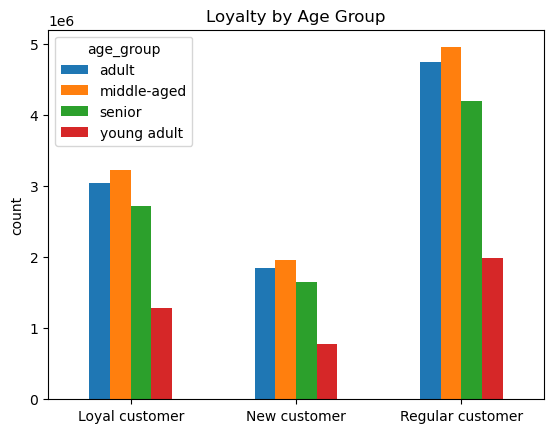

In [12]:
#Bar chart - Loyalty vs Age group
loyalty_age_bar = loyalty_age_cross.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [15]:
#Export the chart
loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age_group_bar.png'))

#### Age groups divided by Spending flag

In [18]:
#Crosstab spending with age group
spending_age_cross = pd.crosstab(instacart['spender_flag'], instacart['age_group'], dropna = False)
spending_age_cross

age_group,adult,middle-aged,senior,young adult
spender_flag,,,,
High_spender,183932,208345,163994,77974
Low_spender,9460963,9931346,8411090,3967215


(array([0, 1]), [Text(0, 0, 'High_spender'), Text(1, 0, 'Low_spender')])

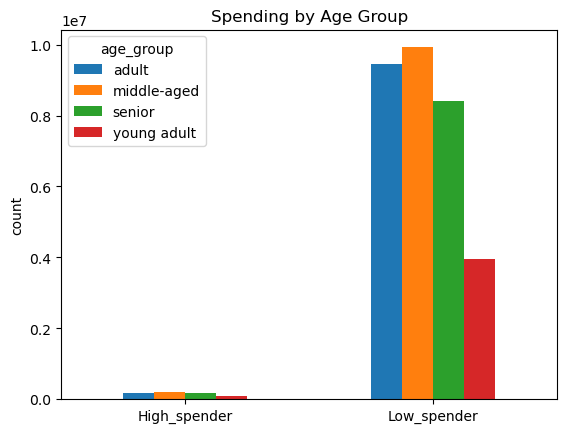

In [20]:
#Bar chart
spending_age_bar = spending_age_cross.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [22]:
#Export the chart
spending_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_age_group_bar.png'))

#### Orders by Departments

In [7]:
#Import departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled3.csv'))

In [9]:
dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
new_header = [ 'department_id', 'department' ]

In [13]:
dept.columns = new_header

In [15]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [19]:
instacart_final = instacart.merge(dept, on='department_id', how='inner')

In [21]:
instacart_final.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Date Joined,Number of Dependents,Family Status,Income,region,activity_flag,income_group,age_group,dependants_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,Midwest,high-activity customer,low-income,senior,has dependants,snacks


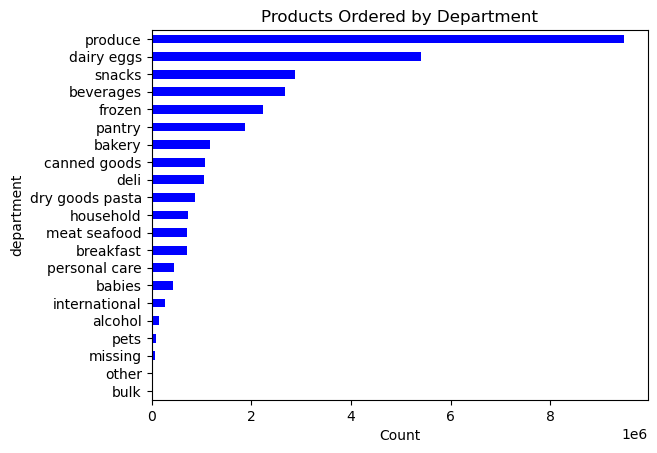

In [25]:
#Bar chart frequency of orders vs department
depts_bar = instacart_final['department'].value_counts(ascending=True).plot(kind='barh', color='blue', xlabel = 'Count', title='Products Ordered by Department')

In [27]:
#Export bar chart
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_bar.png'))

#### Age by Departments

In [30]:
#Crosstab Age group vs Department
age_dept_cross = pd.crosstab(instacart_final['age_group'], instacart_final['department'], dropna = False)
age_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
adult,44890,127238,349788,789244,208477,10271,319096,1615921,313917,256969,...,219146,80649,209439,20381,10730,556843,132443,28324,2832448,860333
middle-aged,49359,134108,366692,850960,221198,10638,333034,1681753,329214,270914,...,230912,83793,220521,21671,11469,587752,141907,29811,2955476,905758
senior,39036,109445,309522,714832,183844,9242,282438,1426213,277618,228935,...,196935,70774,190114,18094,9425,496979,117405,26286,2513763,760515
young adult,20411,53011,146426,333087,89514,4422,133490,674860,130500,109809,...,91673,34037,88853,8999,4667,233795,55817,13295,1177604,360944


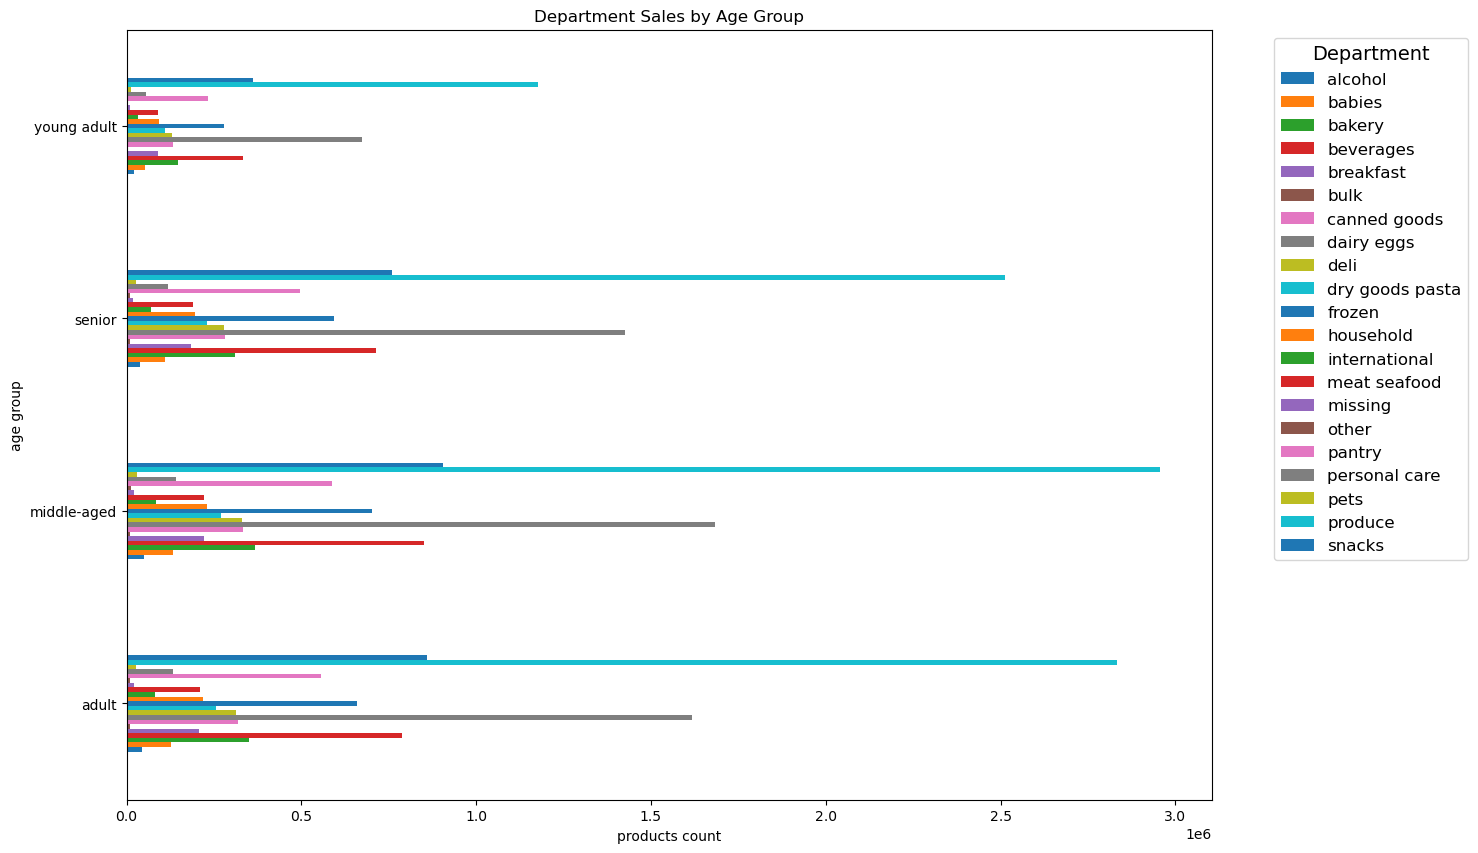

In [32]:
#Bar chart 
age_dept_bar = age_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Age Group')
plt.xlabel('products count')
plt.ylabel('age group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [34]:
#Export bar chart
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_depts_bar.png'))

#### Income by Deparments

In [37]:
#Crosstab Income group vs Department
income_dept_cross = pd.crosstab(instacart_final['income_group'], instacart_final['department'], dropna = False)
income_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high-income,24953,54433,154040,325093,86853,3773,138733,684241,130995,111248,...,96776,34283,95722,8738,4749,242268,56053,13514,1179115,316968
low-income,24324,45598,154056,506792,123852,6226,122799,721677,151289,100274,...,120045,32567,58660,9760,5334,243175,67793,12664,1210629,711874
middle-income,104419,323771,864332,1856238,492328,24574,806526,3992829,768965,655105,...,521845,202403,554545,50647,26208,1389926,323726,71538,7089547,1858708


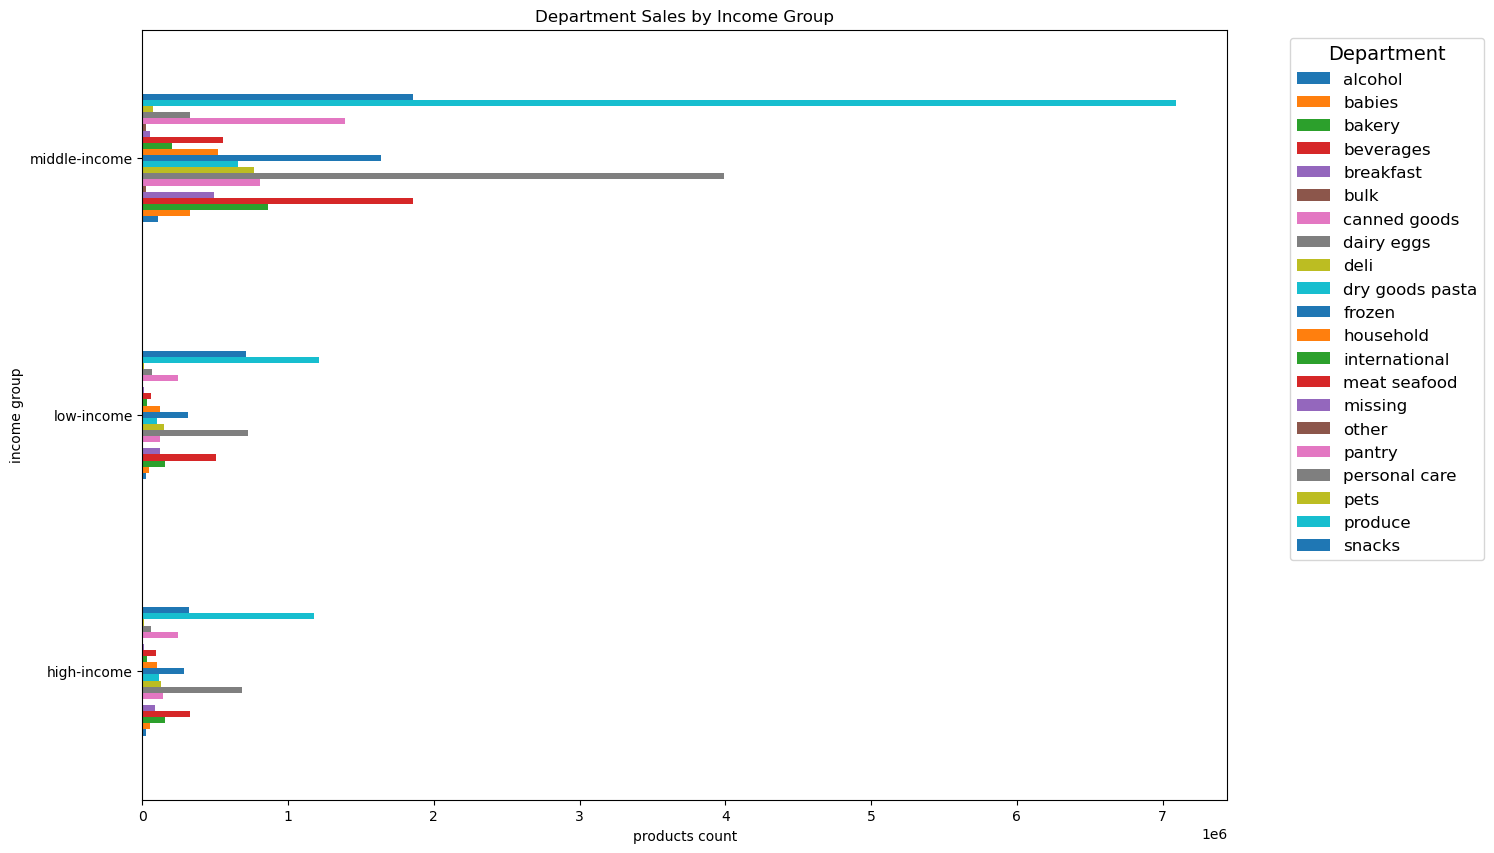

In [39]:
#Bar chart
income_dept_bar = income_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('income group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [41]:
#Export bar chart
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_depts_bar.png'))

In [44]:
#Exporting new dataframe with department merged 
instacart_final.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_final_dataframe.pkl'))

#### 7. Aggregate the max, mean, and min variables on a customer-profile level for Usage frequency and Expenditure

In [55]:
#Create a subset of customer profiles and show the total price of each order
customer_profile = instacart_final.groupby(['user_id', 'Gender', 'State', 'region', 'Number of Dependents', 'Family Status', 'age_group', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'Customer_frequency', 'dependants_flag', 'income_group', 'spender_flag'])['prices'].sum().reset_index()

In [57]:
customer_profile.head()

,user_id,Gender,State,region,Number of Dependents,Family Status,age_group,order_number,orders_day_of_week,order_hour_of_day,loyalty_flag,Customer_frequency,dependants_flag,income_group,spender_flag,prices
0,1,Female,Alabama,South,3,married,adult,1,2,8,New customer,20.5,has dependants,low-income,Low_spender,31.599998
1,1,Female,Alabama,South,3,married,adult,2,3,7,New customer,20.5,has dependants,low-income,Low_spender,35.400002
2,1,Female,Alabama,South,3,married,adult,3,3,12,New customer,20.5,has dependants,low-income,Low_spender,28.200001
3,1,Female,Alabama,South,3,married,adult,4,4,7,New customer,20.5,has dependants,low-income,Low_spender,26.000000
4,1,Female,Alabama,South,3,married,adult,5,4,15,New customer,20.5,has dependants,low-income,Low_spender,57.000000


In [59]:
#Aggregate variables for customer profiles for expenditure
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [61]:
customer_agg

order_number                prices                       
                 max min  mean         max        min        mean
user_id                                                          
1                 10   1   5.5   63.099998  25.000000   37.570000
2                 14   1   7.5  213.100006  19.000000  104.685715
3                 12   1   6.5  107.199997  30.700001   60.116669
4                  5   1   3.0   63.400002  10.800000   29.539999
5                  4   1   2.5  118.400002  43.599998   85.000000
...              ...  ..   ...         ...        ...         ...
206205             3   1   2.0  149.100006  51.599998   95.033333
206206            67   1  34.0  157.300003   9.600000   32.526867
206207            16   1   8.5  200.800003  42.799999  101.931252
206208            49   1  25.0  238.500000  38.700001  115.595924
206209            13   1   7.0  131.500000  11.100000   70.046150

[206208 rows x 6 columns]

In [69]:
#Aggregate variables for customer profiles for usage frequency
freq_agg = instacart_final.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_last_order': ['max', 'min', 'mean']})

In [71]:
freq_agg

order_number                days_since_last_order                 
                 max min       mean                   max   min       mean
user_id                                                                   
1                 10   1   5.813559                  30.0   0.0  20.259260
2                 14   1   8.035897                  30.0   3.0  15.967033
3                 12   1   6.000000                  21.0   7.0  11.487180
4                  5   1   2.888889                  21.0   0.0  15.357142
5                  4   1   2.486486                  19.0  10.0  14.500000
...              ...  ..        ...                   ...   ...        ...
206205             3   1   1.687500                  30.0  10.0  20.666666
206206            67   1  38.007018                  15.0   0.0   4.042705
206207            16   1   8.116592                  30.0   1.0  14.879397
206208            49   1  25.505170                  20.0   0.0   7.442105
206209            13   1   6.937984                  30.0   3.0  20.275862

[206209 rows x 6 columns]

### 8. Compare customer profiles with Regions and Departments

#### Regions by Departments

In [75]:
#Crosstab regions vs department
region_dept_cross = pd.crosstab(instacart_final['region'], instacart_final['department'], dropna = False)
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,36186,98983,273869,625574,163551,8193,250702,1264223,245678,203769,...,175824,63736,166129,16535,8420,442101,105749,22355,2227937,673715
Northeast,26542,75139,208599,483418,123574,5802,186755,954026,186817,151816,...,131485,46891,124620,12374,6585,329445,78815,18601,1665839,514675
South,51624,143654,388815,898940,234251,11533,356015,1796969,349419,287444,...,243070,89142,235752,23193,12212,622436,150350,31269,3160551,957346
West,39344,106026,301145,680191,181657,9045,274586,1383529,269335,223598,...,188287,69484,182426,17043,9074,481387,112658,25491,2424964,741814


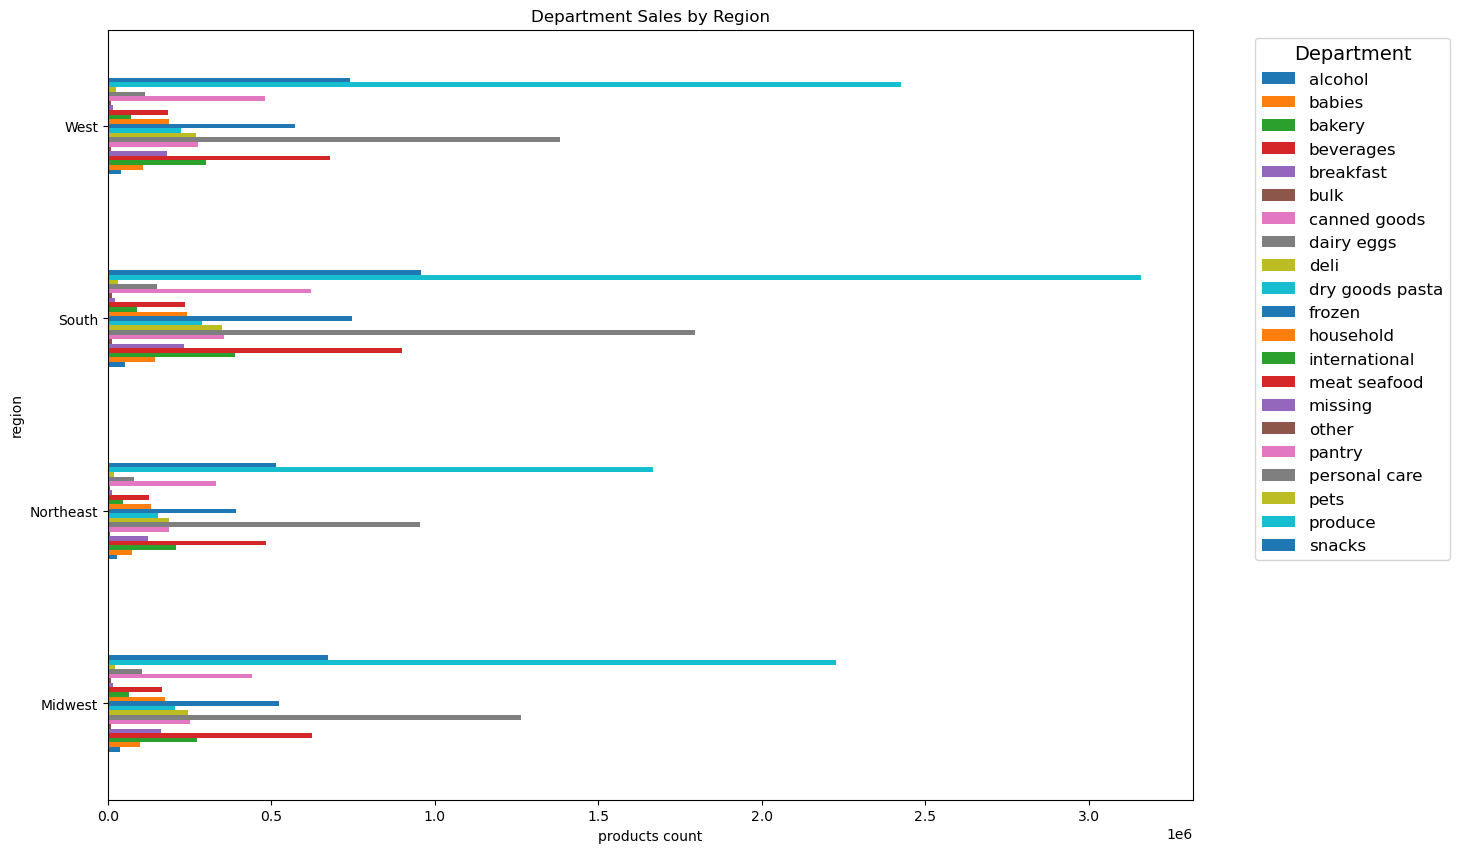

In [77]:
#Bar chart
region_dept_bar = region_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [79]:
#Export bar chart
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_depts_bar.png'))

#### More visualizations

Text(0.5, 0, '')

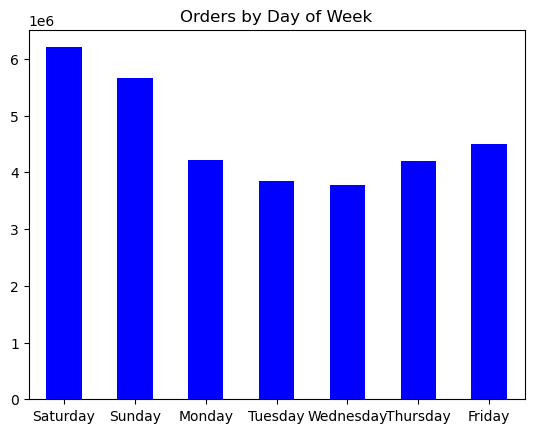

In [82]:
#Bar chart orders by day of week
orders_dow_bar = instacart_final['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'blue')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
orders_dow_bar.set_xlabel("")

In [84]:
#Export bar chart
orders_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow_bar.png'))

Text(0.5, 0, 'Hour of Day (24 hr clock)')

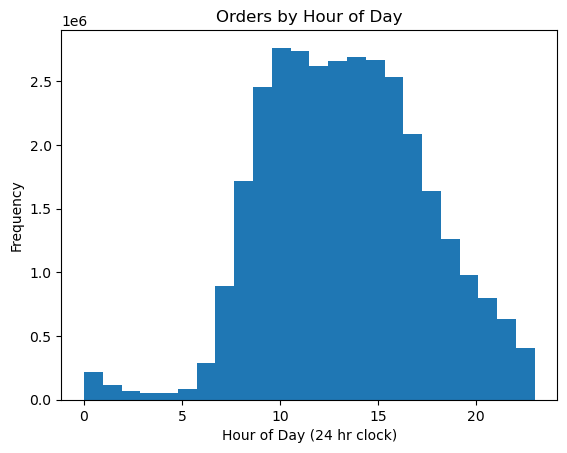

In [86]:
#Histogram Orders by Hour of Day
hod_hist=instacart_final['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day (24 hr clock)')

In [88]:
#Export histogram
hod_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hod_hist.png'))

In [90]:
#Crosstab Loyalty with age group
loyalty_income_cross = pd.crosstab(instacart_final['loyalty_flag'], instacart_final['income_group'], dropna = False)
loyalty_income_cross

income_group,high-income,low-income,middle-income
loyalty_flag,,,
Loyal customer,1310941,1381467,7591685
New customer,731578,1086401,4426011
Regular customer,2008321,2272117,11596338


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

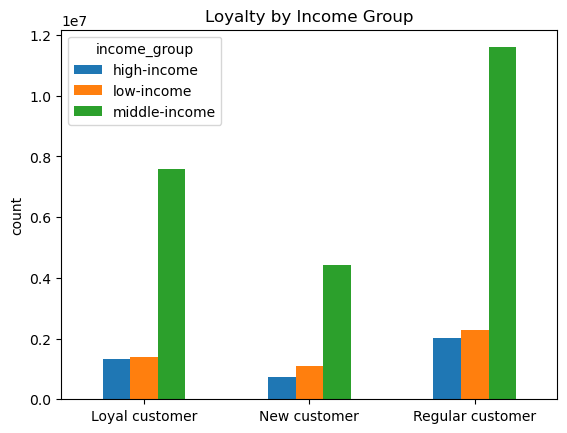

In [92]:
#Bar chart
loyalty_income_bar = loyalty_income_cross.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [94]:
#Export the chart
loyalty_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_income_group_bar.png'))

In [96]:
#Crosstab loyalty with spending
loyalty_spender_cross = pd.crosstab(instacart_final['loyalty_flag'], instacart_final['spender_flag'], dropna = False)
loyalty_spender_cross

spender_flag,High_spender,Low_spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,114831,6129159
Regular customer,302814,15573962


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

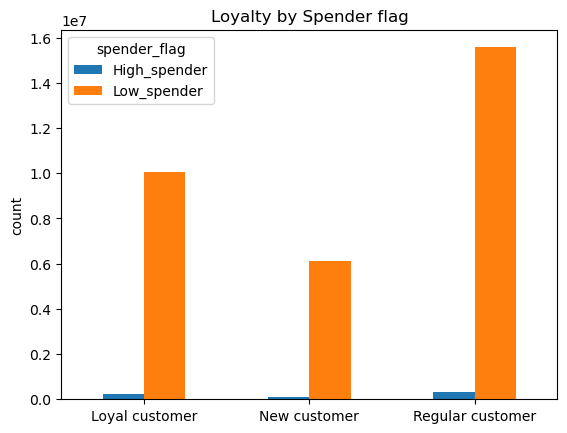

In [98]:
#Bar chart
loyalty_spender_bar = loyalty_spender_cross.plot.bar()
plt.title('Loyalty by Spender flag')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [100]:
#Export the chart
loyalty_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spender_bar.png'))

In [104]:
#Crosstab loyalty with family status
loyalty_fam_cross = pd.crosstab(instacart_final['loyalty_flag'], instacart_final['Family Status'], dropna = False)
loyalty_fam_cross

Family Status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882722,492749,7202500,1706122
New customer,530322,291210,4393693,1028765
Regular customer,1358768,766644,11160560,2590804


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

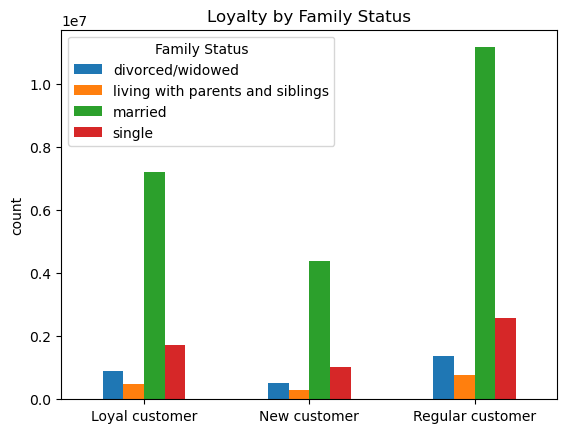

In [106]:
#Bar chart
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [108]:
#Export the chart
loyalty_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_fam_bar.png'))

In [110]:
#Crosstab loyalty with dependants
loyalty_depend_cross = pd.crosstab(instacart_final['loyalty_flag'], instacart_final['dependants_flag'], dropna = False)
loyalty_depend_cross

dependants_flag,has dependants,no dependants
loyalty_flag,,
Loyal customer,7695249,2588844
New customer,4684903,1559087
Regular customer,11927204,3949572


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

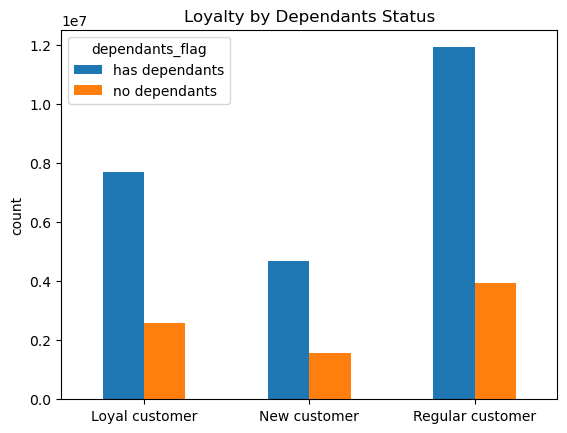

In [112]:
#Bar chart
loyalty_depend_bar = loyalty_depend_cross.plot.bar()
plt.title('Loyalty by Dependants Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [114]:
#Export the chart
loyalty_depend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_depend_bar.png'))

In [116]:
#Check value counts from Family status
fam_status = instacart_final['Family Status'].value_counts(dropna = False)
fam_status

Family Status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

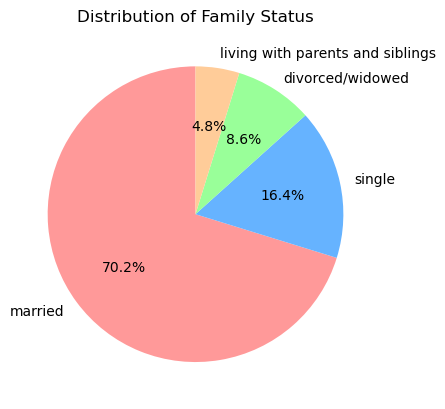

In [118]:
#Pie chart showing the distribution of family status
fam_status_distribution_pie = fam_status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Family Status')
plt.show()

In [120]:
#Export the chart
fam_status_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_bar.png'))